In [5]:
# Logic Operator
import numpy as np
import matplotlib.pyplot as plt
# Sigmoid function
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))
# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
    return x * (1.0 - x)
class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input    = x
        self.neuron   = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
        self.y        = y
        self.output   = np.zeros(self.y.shape)   # instantiating the output
           # N neurons connected to
# instantiating the output
    def feedforward(self):
            self.layer1 = sigmoid(np.dot(self.input, self.weights1))
            self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
    # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
            d_weights2 = np.dot(self.layer1.T,
                                (2*(self.y - self.output)
                                * sigmoid_derivative(self.output)))
            d_weights1 = np.dot(self.input.T,
                                (np.dot(2*(self.y - self.output)
                                * sigmoid_derivative(self.output),
                                self.weights2.T) * sigmoid_derivative(self.layer1)))
            # weights updating
            self.weights1 += d_weights1
            self.weights2 += d_weights2
            iterations = 10
            n_unit = 1
iterations = 2000
n_unit = 1
if __name__ == "__main__":
    Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]])
    Target = np.array([[0],[0],[0],[1]])
    model = NeuralNetwork(Input, Target, n_unit)
    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))     # Objective(loss) function
    Itr = np.linspace(1,len(SSD),len(SSD))
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    print("The target values are:", Target)
    print("The predicted values are:", model.output)

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[4.52769449e-04]
 [1.83874607e-02]
 [1.83874607e-02]
 [4.98107963e-01]]


In [6]:
!pip install scikit-image

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.


In [7]:
# Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 1
model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer = SGD(lr = 0.5),
              metrics=['binary_accuracy'])
model.fit(Input, Target, epochs = 2000, verbose=0)
print("The predicted class labels are:", model.predict(Input))

The predicted class labels are: [[0.5]
 [0.5]
 [0.5]
 [0.5]]


In [9]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

In [10]:
def gen_labels(im_name, pat1, pat2):
    '''
    Parameters
    ----------
    im_name : Str
        The image file name.
    pat1 : Str
        A string pattern in the filename for 1st class, e.g "Mel"
    pat2 : Str
        A string pattern in the filename 2nd class, e.g, "Nev"
    Returns
    -------
    Label : Numpy array
        Class label of the filename name based on its pattern.
    '''
    if pat1 in im_name:
        label = np.array([0])
    elif pat2 in im_name:
        label = np.array([1])
    return label

def get_data(data_path, data_list, img_h, img_w):
    """
    Parameters
    ----------
    train_data_path : Str
        Path to the data directory
    train_list : List
        A list containing the name of the images.
    img_h : Int
        image height to be resized to.
    img_w : Int
        image width to be resized to.
    Returns
    -------
    img_labels : Nested List
        A nested list containing the loaded images along with their
        correcponding labels.
    """
    img_labels = []
    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')])
        if item[0] % 100 == 0:
             print('Reading: {0}/{1}  of train images'.format(item[0], len(data_list)))
    shuffle(img_labels)
    return img_labels

def get_data_arrays(nested_list, img_h, img_w):
    """
    Parameters
    ----------
    nested_list : nested list
        nested list of image arrays with corresponding class labels.
    img_h : Int
        Image height.
    img_w : Int
    Image width.
    Returns
    -------
    img_arrays : Numpy array
        4D Array with the size of (n_data,img_h,img_w, 1)
    label_arrays : Numpy array
        1D array with the size (n_data).
    """
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
    label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind] = nested_list[ind][1]
    img_arrays = np.expand_dims(img_arrays, axis =3)
    return img_arrays, label_arrays

def get_train_test_arrays(train_data_path, test_data_path, train_list,
                          test_list, img_h, img_w):
    """
    Get the directory to the train and test sets, the files names and
    the size of the image and return the image and label arrays for
    train and test sets.
    """
    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)
    train_img, train_label =  get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del(train_data)
    del(test_data)
    return train_img, test_img, train_label, test_label


img_w, img_h = 128, 128      # Setting the width and heights of the images.
data_path = '/DL_course_data/Lab1/Skin/'     # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(
        train_data_path, test_data_path,
        train_list, test_list, img_h, img_w)

Reading: 0/1000  of train images
Reading: 100/1000  of train images
Reading: 200/1000  of train images
Reading: 300/1000  of train images
Reading: 400/1000  of train images
Reading: 500/1000  of train images
Reading: 600/1000  of train images
Reading: 700/1000  of train images
Reading: 800/1000  of train images
Reading: 900/1000  of train images
Reading: 0/200  of train images
Reading: 100/200  of train images


In [10]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

def model(img_width, img_height, img_ch, base_dense):
    """
    Functional API model.
    name the last layer as "out"; e.g., out = ....
    """

    
    input_size = (img_width, img_height, img_ch)
    inputs_layer = Input(shape=input_size, name='input_layer')
    x = Flatten()(inputs_layer)
    second_layer = Dense(base_dense,  activation='relu')(x)
    third_layer = Dense(base_dense//2,  activation='relu')(second_layer)
    out = Dense(img_ch, activation='sigmoid')(third_layer)
    
    # TODO
    clf = Model(inputs=inputs_layer, outputs=out)

    clf.summary()
    return clf

In [11]:
n_epochs = 50
Batch_Size = 16
base_dense = 64
LR = 0.1

clf = model(img_w,img_h,1,base_dense)
clf.compile(loss='binary_crossentropy',
              optimizer = SGD(lr = LR),
              metrics=['binary_accuracy'])

clf_hist = clf.fit(x_train, y_train,validation_data=(x_test,y_test), 
                   batch_size = Batch_Size, epochs = n_epochs, verbose=1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 128, 128, 1)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1048640   
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,050,753
Trainable params: 1,050,753
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 200 samples
Epoch 1/50
1000/1000 [==============================] - 0s 398us/sampl

Epoch 45/50
1000/1000 [==============================] - 0s 214us/sample - loss: 0.6938 - binary_accuracy: 0.5060 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 46/50
1000/1000 [==============================] - 0s 240us/sample - loss: 0.6937 - binary_accuracy: 0.4900 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 47/50
1000/1000 [==============================] - 0s 240us/sample - loss: 0.6938 - binary_accuracy: 0.5060 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 48/50
1000/1000 [==============================] - 0s 214us/sample - loss: 0.6941 - binary_accuracy: 0.4560 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 49/50
1000/1000 [==============================] - 0s 276us/sample - loss: 0.6935 - binary_accuracy: 0.5100 - val_loss: 0.6934 - val_binary_accuracy: 0.5000
Epoch 50/50
1000/1000 [==============================] - 0s 213us/sample - loss: 0.6936 - binary_accuracy: 0.5040 - val_loss: 0.6934 - val_binary_accuracy: 0.5000


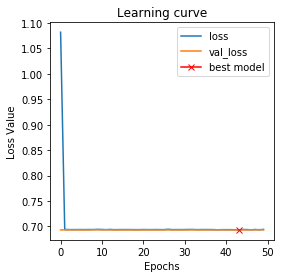

In [175]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["loss"]),
         np.min(clf_hist.history["loss"]),
         marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def model(img_ch, img_width, img_height):
    base = 32
    model = Sequential()
    model.add(Conv2D(base, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same',
                     input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(base*2, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(base*2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model

In [ ]:
n_epochs = 20
Batch_Size = 8
LR = 0.0001

model_LeNet = model(1,img_w,img_h)
model_LeNet.compile(loss='binary_crossentropy',
              optimizer = SGD(lr = LR),
              metrics=['binary_accuracy'])

model_LeNet_hist = model_LeNet.fit(x_train, y_train,validation_data=(x_test,y_test), 
                   batch_size = Batch_Size, epochs = n_epochs, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(model_LeNet_hist.history["loss"], label="loss")
plt.plot(model_LeNet_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(model_LeNet_hist.history["loss"]),
         np.min(model_LeNet_hist.history["loss"]),
         marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

In [64]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.optimizers import SGD, Adam



def model(img_ch, img_width, img_height):
    
    
    model = Sequential()
    n_base = 8
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=n_base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=n_base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=n_base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=n_base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
#     model.add(Dropout(0.4))

    model.add(Dense(64))
    model.add(Activation('relu'))
#     model.add(Dropout(0.4))


    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.summary()   
    return model

In [65]:
n_epochs = 150
Batch_Size = 2
LR = 1e-5

model_AlexNet = model(1,img_w,img_h)
model_AlexNet.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = LR),
              metrics=['binary_accuracy'])

model_AlexNet_hist = model_LeNet.fit(x_train, y_train,validation_data=(x_test,y_test), 
                   batch_size = Batch_Size, epochs = n_epochs, verbose=1)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_134 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_135 (Activation)  (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 32, 32, 32)      

1000/1000 [==============================] - 27s 27ms/sample - loss: 0.5881 - binary_accuracy: 0.7130 - val_loss: 0.6188 - val_binary_accuracy: 0.7250
Epoch 33/150
1000/1000 [==============================] - 28s 28ms/sample - loss: 0.5843 - binary_accuracy: 0.7080 - val_loss: 0.6195 - val_binary_accuracy: 0.7100
Epoch 34/150
1000/1000 [==============================] - 27s 27ms/sample - loss: 0.5884 - binary_accuracy: 0.6940 - val_loss: 0.6229 - val_binary_accuracy: 0.7050
Epoch 35/150
1000/1000 [==============================] - 27s 27ms/sample - loss: 0.5853 - binary_accuracy: 0.7090 - val_loss: 0.6330 - val_binary_accuracy: 0.6800
Epoch 36/150
1000/1000 [==============================] - 27s 27ms/sample - loss: 0.5849 - binary_accuracy: 0.6970 - val_loss: 0.6213 - val_binary_accuracy: 0.7100
Epoch 37/150
1000/1000 [==============================] - 27s 27ms/sample - loss: 0.5875 - binary_accuracy: 0.7140 - val_loss: 0.6204 - val_binary_accuracy: 0.7100
Epoch 38/150
1000/1000 [=====

1000/1000 [==============================] - 18s 18ms/sample - loss: 0.5670 - binary_accuracy: 0.7200 - val_loss: 0.6200 - val_binary_accuracy: 0.6950
Epoch 83/150
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.5678 - binary_accuracy: 0.7110 - val_loss: 0.6254 - val_binary_accuracy: 0.6900
Epoch 84/150
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.5749 - binary_accuracy: 0.7180 - val_loss: 0.6174 - val_binary_accuracy: 0.7200
Epoch 85/150
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.5720 - binary_accuracy: 0.7140 - val_loss: 0.6192 - val_binary_accuracy: 0.6850
Epoch 86/150
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.5704 - binary_accuracy: 0.7230 - val_loss: 0.6414 - val_binary_accuracy: 0.6800
Epoch 87/150
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.5729 - binary_accuracy: 0.7250 - val_loss: 0.6199 - val_binary_accuracy: 0.7100
Epoch 88/150
1000/1000 [=====

Epoch 132/150
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.5544 - binary_accuracy: 0.7220 - val_loss: 0.6124 - val_binary_accuracy: 0.7050
Epoch 133/150
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.5507 - binary_accuracy: 0.7340 - val_loss: 0.6195 - val_binary_accuracy: 0.7200
Epoch 134/150
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.5544 - binary_accuracy: 0.7260 - val_loss: 0.6179 - val_binary_accuracy: 0.7000
Epoch 135/150
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.5493 - binary_accuracy: 0.7310 - val_loss: 0.6518 - val_binary_accuracy: 0.6900
Epoch 136/150
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.5520 - binary_accuracy: 0.7210 - val_loss: 0.6341 - val_binary_accuracy: 0.6950
Epoch 137/150
1000/1000 [==============================] - 18s 18ms/sample - loss: 0.5484 - binary_accuracy: 0.7400 - val_loss: 0.6190 - val_binary_accuracy: 0.7000
Epoch 138/

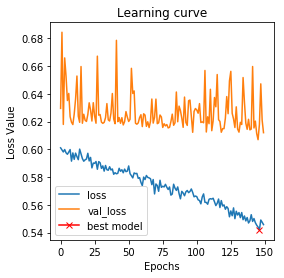

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(model_AlexNet_hist.history["loss"], label="loss")
plt.plot(model_AlexNet_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(model_AlexNet_hist.history["loss"]),
         np.min(model_AlexNet_hist.history["loss"]),
         marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

In [ ]:
def VGG16_model(img_ch, img_width, img_height):
    
    model = Sequential()
    n_base = 8
    
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters=n_base*2, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=n_base*2, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    

    model.add(Conv2D(filters=n_base*4, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=n_base*4, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=n_base*4, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters=n_base*8, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=n_base*8, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=n_base*8, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=n_base*8, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu')
    model.add(Conv2D(filters=n_base*8, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu')
    model.add(Conv2D(filters=n_base*8, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu')
    model.add(MaxPooling2D(pool_size=(2,2)))

    
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(Activation('relu'))

    model.add(Dense(64))
    model.add(Activation('softmax'))